## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/out2_SVD.csv')


In [ ]:
dataset

,Unnamed: 0,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,0,Inflammatory Condition,0.684736,1.094358,4.266503,1.528060,1.057395,3.382315,1.648307,1.289089,...,1.402457,0.085808,1.925818,1.749676,2.984017,4.292385,2.122216,2.927343,1.073035,3.937057
1,1,Structural Voice Disorder,0.871068,0.856265,3.332651,1.883991,3.054763,2.024927,2.205319,1.780958,...,2.149368,0.574115,2.465599,2.296203,2.425002,4.109804,3.667325,4.029390,1.241850,3.511963
2,2,Neurogenic Voice Disorder,0.263680,1.537586,3.076794,1.884197,1.480983,2.611841,0.965310,1.228733,...,0.969947,-0.477030,1.381939,2.279585,2.227781,3.498236,3.691297,3.187024,1.446881,3.890237
3,3,Neurogenic Voice Disorder,0.754115,1.397247,2.167469,1.793807,2.131488,1.989462,1.539565,1.685215,...,1.621875,0.563281,1.559592,2.227160,2.611279,4.376622,2.822068,2.376310,1.053318,3.731236
4,4,Inflammatory Condition,0.965740,1.124368,1.564215,1.364656,0.977921,1.896675,1.315061,1.331996,...,1.988981,-0.679599,1.673493,2.042848,2.938716,5.130287,3.482903,2.752854,1.095803,3.411341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,1693,Healthy,2.024716,0.503130,2.275145,4.532817,2.380664,2.087517,1.011774,1.222826,...,1.632387,1.741208,2.211022,2.069741,3.583374,4.926073,4.439837,2.926408,1.018939,3.746580
1694,1694,Inflammatory Condition,1.185719,1.804760,1.150043,1.977515,0.952399,1.654979,1.260184,1.169428,...,2.404589,-0.166153,1.853994,2.188813,2.506703,3.593488,2.815110,2.177589,1.071473,3.797037
1695,1695,Healthy,1.526312,0.420909,2.557276,5.184787,1.483482,3.037628,1.643406,0.640675,...,2.622857,1.136733,1.361925,2.463858,2.855097,3.774076,2.397844,2.602292,0.897452,3.612971
1696,1696,Muscle Tension Voice Disorder,0.490071,1.935272,3.109821,1.721946,0.909837,3.030045,2.146708,0.864369,...,1.029839,-0.302538,2.312264,1.706587,2.403816,4.661357,2.525895,2.782140,0.572878,3.537733


In [ ]:
np.unique(dataset.iloc[:,1].values.astype("str"))

array(['Functional Voice Disorder', 'Healthy', 'Inflammatory Condition',
       'Muscle Tension Voice Disorder', 'Neurogenic Voice Disorder',
       'Structural Voice Disorder'], dtype='<U29')

In [ ]:
dataset.iloc[:,-1].values.shape

(1698,)

In [ ]:
newlabels=[]
for i in dataset.iloc[:,-1].values:
  if  'healthy' in i:newlabels.append(0)
  elif 'hyperkinetic dysphonia' in i:newlabels.append(1)
  elif 'hypokinetic dysphonia' in i: newlabels.append(2)
  elif 'reflux laryngitis' in i: newlabels.append(3)
newlabels=np.array(newlabels)
newlabels.shape

TypeError: argument of type 'numpy.float64' is not iterable

In [ ]:
y=dataset.iloc[:,1].values

In [ ]:
y

array(['Inflammatory Condition', 'Structural Voice Disorder',
       'Neurogenic Voice Disorder', ..., 'Healthy',
       'Muscle Tension Voice Disorder', 'Functional Voice Disorder'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)

In [ ]:
y

array([2, 5, 4, ..., 1, 3, 0])

In [ ]:
columns=[f"feature{i}" for i in range(1,513)]
columns.insert(0,"labels")

In [ ]:
columns

['labels',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29',
 'feature30',
 'feature31',
 'feature32',
 'feature33',
 'feature34',
 'feature35',
 'feature36',
 'feature37',
 'feature38',
 'feature39',
 'feature40',
 'feature41',
 'feature42',
 'feature43',
 'feature44',
 'feature45',
 'feature46',
 'feature47',
 'feature48',
 'feature49',
 'feature50',
 'feature51',
 'feature52',
 'feature53',
 'feature54',
 'feature55',
 'feature56',
 'feature57',
 'feature58',
 'feature59',
 'feature60',
 'feature61',
 'feature62',
 'feature63',
 'feature64',
 'feature65',
 'feature66',
 'feature67',
 'feature68',
 'feature69',
 'feature70',
 'feature71',
 'fe

In [ ]:
dataset=pd.DataFrame(dataset.iloc[:,1:].values,columns=columns)

In [ ]:
dataset

,labels,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Inflammatory Condition,0.684736,1.094358,4.266503,1.52806,1.057395,3.382315,1.648307,1.289089,1.40549,...,1.402457,0.085808,1.925818,1.749676,2.984017,4.292385,2.122216,2.927343,1.073035,3.937057
1,Structural Voice Disorder,0.871068,0.856265,3.332651,1.883991,3.054763,2.024927,2.205319,1.780958,1.504201,...,2.149368,0.574115,2.465599,2.296203,2.425002,4.109804,3.667325,4.02939,1.24185,3.511963
2,Neurogenic Voice Disorder,0.26368,1.537586,3.076794,1.884197,1.480983,2.611841,0.96531,1.228733,2.414051,...,0.969947,-0.47703,1.381939,2.279585,2.227781,3.498236,3.691297,3.187024,1.446881,3.890237
3,Neurogenic Voice Disorder,0.754115,1.397247,2.167469,1.793807,2.131488,1.989462,1.539565,1.685215,1.861938,...,1.621875,0.563281,1.559592,2.22716,2.611279,4.376622,2.822068,2.37631,1.053318,3.731236
4,Inflammatory Condition,0.96574,1.124368,1.564215,1.364656,0.977921,1.896675,1.315061,1.331996,1.908712,...,1.988981,-0.679599,1.673493,2.042848,2.938716,5.130287,3.482903,2.752854,1.095803,3.411341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Healthy,2.024716,0.50313,2.275145,4.532817,2.380664,2.087517,1.011774,1.222826,5.365314,...,1.632387,1.741208,2.211022,2.069741,3.583374,4.926073,4.439837,2.926408,1.018939,3.74658
1694,Inflammatory Condition,1.185719,1.80476,1.150043,1.977515,0.952399,1.654979,1.260184,1.169428,2.202511,...,2.404589,-0.166153,1.853994,2.188813,2.506703,3.593488,2.81511,2.177589,1.071473,3.797037
1695,Healthy,1.526312,0.420909,2.557276,5.184787,1.483482,3.037628,1.643406,0.640675,5.502381,...,2.622857,1.136733,1.361925,2.463858,2.855097,3.774076,2.397844,2.602292,0.897452,3.612971
1696,Muscle Tension Voice Disorder,0.490071,1.935272,3.109821,1.721946,0.909837,3.030045,2.146708,0.864369,1.644267,...,1.029839,-0.302538,2.312264,1.706587,2.403816,4.661357,2.525895,2.78214,0.572878,3.537733


In [ ]:
"""X = dataset.iloc[:, 4:].values
y = dataset.loc[:, "Diagnosis"].values"""

In [ ]:
X = dataset.iloc[:,1:].values
y = y

In [ ]:
y

array([2, 5, 4, ..., 1, 3, 0])

In [ ]:
X.shape,len(y)

((1698, 512), 1698)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.17913304, -1.37755424,  0.95131265, ..., -0.09228291,
        -0.15323507, -0.34051589],
       [ 0.8969915 , -1.65655538,  0.08018264, ..., -0.88887484,
        -0.18125576, -1.00474435],
       [ 0.30677433, -0.29914898,  0.14295509, ..., -0.30044649,
        -0.24022496, -0.04727867],
       ...,
       [ 1.25092463, -0.81153205, -0.58159879, ..., -0.29761259,
         1.70808362,  0.6194534 ],
       [ 0.00903164,  0.51067458,  1.13014019, ...,  1.00639862,
         0.52945046, -0.24426227],
       [-1.12192914, -0.07702865,  1.21000738, ...,  0.3699099 ,
        -0.27634347,  0.87286912]])

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =60)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)
#X = pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =40,kernel="rbf")
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

# Applying LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2,)
lda.fit(X_train,y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )

#TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(n_components=2)
X_train1=tsne.fit_transform(X_train,y_train)


In [ ]:
from sklearn.manifold import Isomap
tsne=Isomap(n_neighbors=40,n_components=2)
X_train1=tsne.fit_transform(X_train,y_train)
X_test1=tsne.transform(X_test)


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
ltsa = LocallyLinearEmbedding(n_components=20, method='ltsa', n_neighbors=40)
X_train1 = ltsa.fit_transform(X_train,y_train)
X_test1=ltsa.transform(X_test)

In [ ]:
variances = np.var(X_train, axis=0)
print("Feature variances:", variances)
near_zero_variance_features = np.where(variances < 1e-10)
print("Near-zero variance features:", near_zero_variance_features)

# Check for duplicate rows
unique_rows, counts = np.unique(X_train, axis=0, return_counts=True)
duplicate_rows = unique_rows[counts > 1]
print("Duplicate rows in X_train:", duplicate_rows)

Feature variances: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [ ]:
X_train


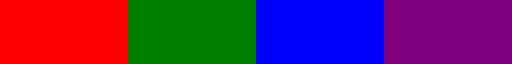

In [ ]:
ListedColormap(('red', 'green',"blue","purple"))

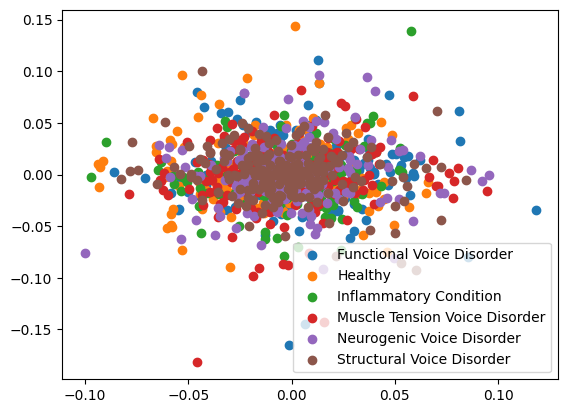

In [ ]:
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y)):
    plt.scatter(X_train1[y_train == j, 0], X_train1[y_train == j, 1],  label = le.inverse_transform([j])[0])
plt.legend()
plt.show()

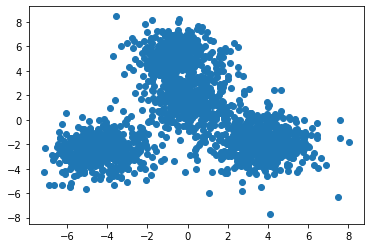

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

# Principal Component Analysis (PCA)

#RANDOM FORREST




## Training the Random Forest Classification model on the Training set

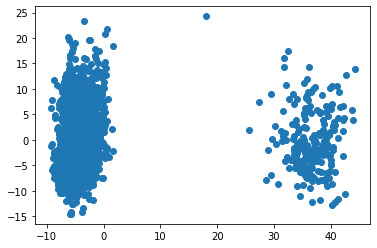

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


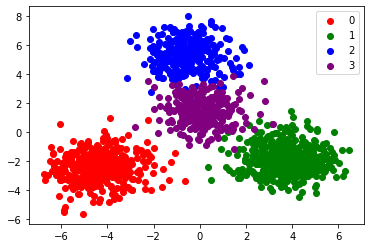

In [ ]:

from matplotlib.colors import ListedColormap
X_set,y_set=np.concatenate([X_train]),np.concatenate([y_train])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [3 2]
 [3 3]
 [1 3]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [1 3]
 [3 3]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [1 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [3 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [3 2]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [3 2]
 [3 3]
 [1 1]
 [3 1]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [1 0]
 [3 3]
 [3 2]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [1 1]
 [3 2]
 [0 0]
 [1 1]
 [0 0]
 [3 2]
 [1 1]
 [0 0]
 [2 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 3]
 [0 0]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 3]
 [1 1]
 [1 1]
 [0 3]
 [0 0]
 [0 0]
 [0 0]
 [3 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [3 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [3 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [3 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [3 3]

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[119   4   0   5]
 [  1 150   3  12]
 [  0   0  65  21]
 [  2   8   6  72]]


0.8675213675213675

## Visualising the Training set results

<ipython-input-34-651fa9a4423a>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


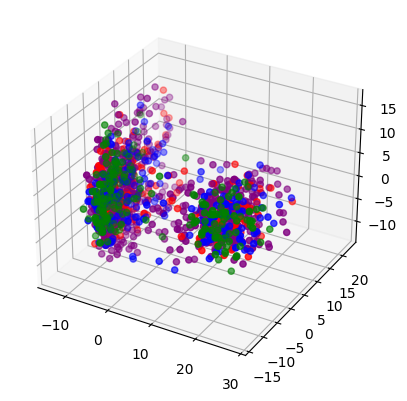

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X_set,y_set=X_train,y_train
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

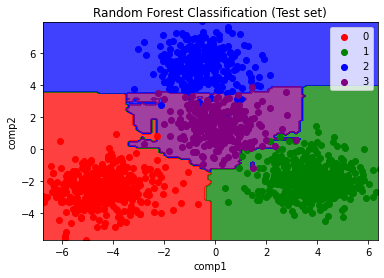

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.1),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 40 features as input.

In [ ]:
X_train,X_test

(array([[  3.10651055,   9.83453225,  -1.5307264 , ...,  -2.61130079,
          -0.53426461,  -0.4569441 ],
        [ -3.32242822,  -4.29547586,  -2.47082601, ...,   0.15253663,
          -1.00741182,  -1.28876178],
        [-10.48670395,   2.65218023,  -0.94937056, ...,   1.72139609,
          -1.0516446 ,   1.43526426],
        ...,
        [ -7.20620724,  -3.17867954,  -0.29650838, ...,   0.72844143,
          -0.02017165,  -1.06180417],
        [  0.1292821 ,  -3.2947725 ,   8.22484309, ...,   1.02932391,
          -1.14524987,  -0.85280632],
        [ -4.34369597,  -5.64107722,  -5.75110698, ...,  -2.64977503,
           1.28110034,   1.96527574]]),
 TruncatedSVD(n_components=40))

#SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ="rbf"  )
classifier.fit(X_train, y_train)

SVC()

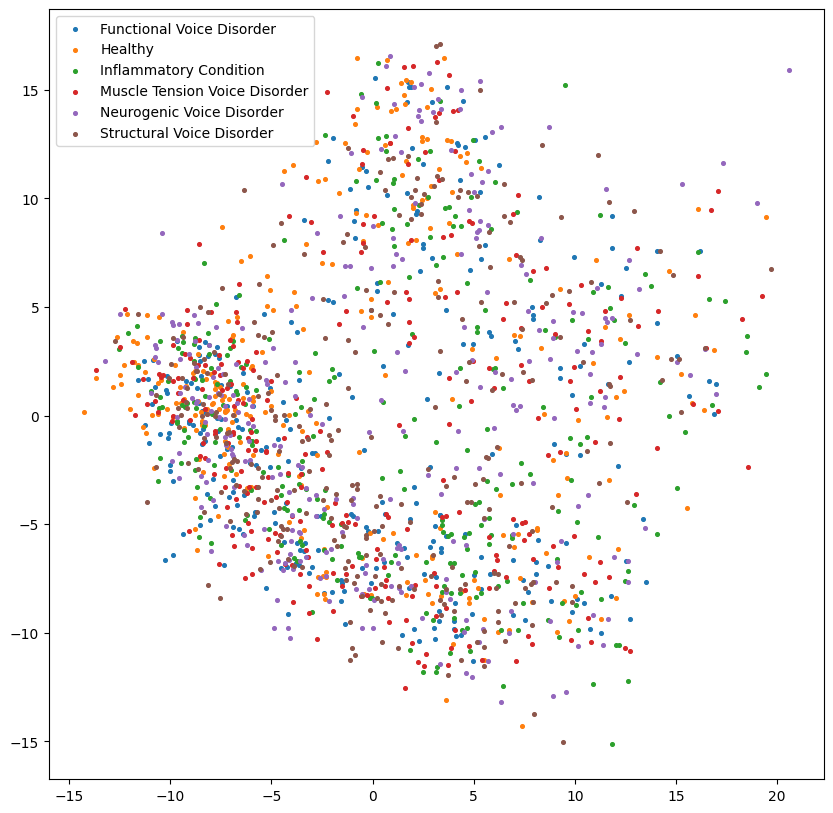

In [ ]:
plt.figure(figsize=(10,10))
for k,i in enumerate(np.unique(y)):

    plt.scatter(np.concatenate([X_train[y_train[:]==i,0],X_test[y_test[:]==i,0]]),np.concatenate([X_train[y_train[:]==i,1],X_test[y_test[:]==i,1]]),label=le.inverse_transform([i])[0], s=7)
    plt.legend()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 0]
 [4 2]
 [3 4]
 [5 5]
 [3 2]
 [4 5]
 [1 4]
 [2 1]
 [1 3]
 [2 2]
 [1 3]
 [3 5]
 [3 4]
 [1 3]
 [5 5]
 [4 3]
 [0 4]
 [2 3]
 [0 1]
 [2 3]
 [3 0]
 [0 3]
 [5 2]
 [3 4]
 [1 0]
 [0 0]
 [0 2]
 [0 3]
 [4 2]
 [2 2]
 [3 2]
 [0 0]
 [1 1]
 [0 3]
 [5 4]
 [5 0]
 [3 3]
 [0 3]
 [0 4]
 [0 1]
 [4 0]
 [3 3]
 [0 0]
 [1 0]
 [2 2]
 [3 3]
 [3 0]
 [5 5]
 [1 0]
 [1 2]
 [4 5]
 [5 5]
 [2 2]
 [2 5]
 [5 5]
 [2 0]
 [4 4]
 [5 5]
 [2 5]
 [5 5]
 [5 5]
 [0 0]
 [5 0]
 [4 0]
 [0 1]
 [2 1]
 [2 2]
 [0 3]
 [1 2]
 [4 5]
 [2 2]
 [4 3]
 [1 1]
 [1 3]
 [1 5]
 [1 1]
 [2 0]
 [1 1]
 [4 4]
 [3 0]
 [0 2]
 [1 3]
 [1 3]
 [5 1]
 [4 4]
 [1 0]
 [2 0]
 [4 4]
 [1 1]
 [1 3]
 [2 1]
 [0 4]
 [3 0]
 [0 0]
 [4 2]
 [3 5]
 [0 0]
 [3 3]
 [2 2]
 [0 3]
 [4 4]
 [1 1]
 [0 5]
 [0 5]
 [3 3]
 [2 2]
 [4 3]
 [5 4]
 [4 5]
 [2 3]
 [2 2]
 [0 4]
 [5 4]
 [3 5]
 [1 1]
 [1 0]
 [0 1]
 [2 0]
 [5 5]
 [2 5]
 [5 2]
 [2 0]
 [1 1]
 [4 4]
 [1 5]
 [0 2]
 [5 4]
 [1 1]
 [4 1]
 [5 3]
 [2 0]
 [0 2]
 [4 4]
 [4 1]
 [5 5]
 [4 4]
 [2 2]
 [1 1]
 [3 3]
 [1 4]
 [1 1]
 [4 5]
 [2 3]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[29 10 12  9  6  8]
 [13 42  4  4  2  2]
 [10  9 24  5  9  8]
 [12 17  9 14  6 14]
 [15 13  8  7 23  8]
 [13  8  8  9 12 23]]


0.36470588235294116

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Kernel SVM (Training set)')
plt.xlabel('Comp2')
plt.ylabel('Comp1')
plt.legend()
plt.show()

ValueError: X has 2 features, but SVC is expecting 40 features as input.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

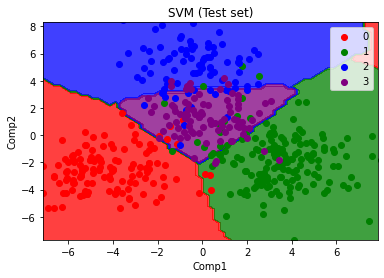

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())
labs=np.unique(newlabels)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('SVM (Test set)')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120   1   0   7]
 [  1 147   3  15]
 [  0   0  66  20]
 [  0   8   9  71]]


0.8632478632478633

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

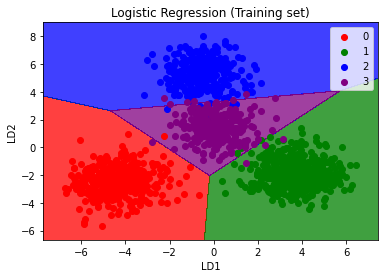

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue',"purple"))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

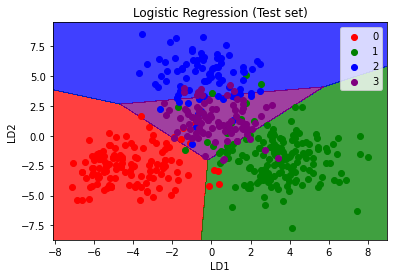

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', "blue","purple"))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Training XGBoost on the Training set

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[118   4   0   6]
 [  1 149   3  13]
 [  0   0  72  14]
 [  0   5   8  75]]


0.8846153846153846

In [ ]:
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.36 %
Standard Deviation: 2.18 %


# Nueva sección

In [ ]:
# evaluate lda with logistic regression algorithm for classification
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc" , StandardScaler()),("pca" , PCA(n_components =60)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.281 (0.033)


#SVD

SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd= TruncatedSVD(n_components=40)
X_train=svd.fit_transform(X_train,y_train)
X_test=svd.transform(X_test)

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from sklearn.svm import SVC
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# define dataset
# define the pipeline
steps = [("sc" , StandardScaler()),('svd', TruncatedSVD(n_components=40)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.375 (0.040)


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [('pca', PCA(n_components=40)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.953 (0.014)


In [ ]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=2)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: nan (nan)


c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 177, in null_space
    eigen_values, eigen_vectors = eigsh(
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py", line 1651, in eigsh
    Minv_matvec = get_OPinv_matvec(A, M, sigma,
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-pac

In [ ]:
# evaluate modified lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('lltsa', LocallyLinearEmbedding(n_components=1000, method='standard', n_neighbors=5)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 799, in fit_transform
    self._fit_transform(X)
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 746, in _fit_transform
    self.embedding_, self.reconstruction_error_ = locally_linear_embedding(
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 325, in locally_linear_embedding
    raise ValueError(
ValueError: output dimension must be less than or equal to input dimension
